In [22]:
import numpy as np
import matplotlib.pyplot as plt

#题目：
#点(4,3)(3,3)(5,3)属于类1，点(2,0)属于类-1

In [23]:
#输入数据
X = np.array([[1,4,3],
             [1,3,3],
             [1,5,3],
             [1,2,0]])
#标签
Y = np.array([1,1,1,-1])
#权值初始化，1行3列，取值范围-1到1
W = (np.random.random(3)-0.5)*2
#W = np.array([0.1, 0.1, 0.8])
print(W)
#学习率设置
lr = 0.11
#计算迭代次数
n = 0
#神经网络输出
O = 0

def update():
    global X,Y,W,lr,n
    n+=1
    #O = np.sign(np.dot(X,W.T))
    #delta = (Y-O.T).dot(X)
    #print('delta=',delta)
    #W_C = lr * (delta)
    O = np.sign(np.dot(X,W.T))
    W_C = lr * ((Y-O.T).dot(X))
    
    #数据量太多时，W_C的值会非常大，因此需要求平均，即使用W_C除以X数组的维度
    W = W + W_C/int(X.shape[0])
    
    print('W_C=',W_C)
    print('W=',W)

[-0.13599305  0.5700637  -0.65668167]


('Initial: W=', array([-0.13599305,  0.5700637 , -0.65668167]))
('input_count=', 4)
0
('W_C=', array([ 0.  ,  0.22,  0.66]))
('W=', array([-0.13599305,  0.6250637 , -0.49168167]))
('sum=', array([ 0.88921675,  0.26415305,  1.51428045,  1.11413436]))
('O=', array([ 1.,  1.,  1.,  1.]))
('k=', 1.2712772060361934)
('d=', -0.27658758245530835)
1
('W_C=', array([-0.22, -0.44,  0.  ]))
('W=', array([-0.19099305,  0.5150637 , -0.49168167]))
('sum=', array([ 0.39421675, -0.12084695,  0.90928045,  0.83913436]))
('O=', array([ 1., -1.,  1.,  1.]))
('k=', 1.0475552206902363)
('d=', -0.38844857512828684)
2
('W_C=', array([ 0.  ,  0.22,  0.66]))
('W=', array([-0.19099305,  0.5700637 , -0.32668167]))
('sum=', array([ 1.10921675,  0.53915305,  1.67928045,  0.94913436]))
('O=', array([ 1.,  1.,  1.,  1.]))
('k=', 1.7450128082303376)
('d=', -0.58464573043307355)
3
('W_C=', array([-0.22, -0.44,  0.  ]))
('W=', array([-0.24599305,  0.4600637 , -0.32668167]))
('sum=', array([ 0.61421675,  0.15415305,  1.0

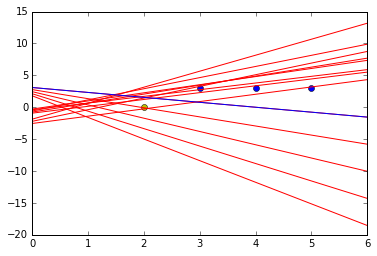

In [24]:
print('Initial: W=',W)
        
#正样本
x1 = [3,4,5]
y1 = [3,3,3]
#负样本
x2 = [2]
y2 = [0]

xdata = np.linspace(0,6)

plt.figure()
plt.plot(x1,y1,'bo')
plt.plot(x2,y2,'yo')

print('input_count=', int(X.shape[0]))

kfinal=0
dfinal=0
for _ in range(100):
    print(n) #打印迭代次数
    update() #更新权值
    #print(W) #打印当前权值
    sum = np.dot(X,W.T)
    O = np.sign(sum)#计算当前输出
    print('sum=',sum)
    print('O=',O)
    #计算分界线的斜率以及截距
    k = -W[1]/W[2]
    d = -W[0]/W[2]
    print('k=',k)
    print('d=',d)
    kfinal=k
    dfinal=d
    plt.plot(xdata,xdata*k+d,'r')
    if (O == Y.T).all(): #如果实际输出等于期望输出，模型收敛，循环结束
        print('Finished')
        print('epoch:',n)
        break

plt.plot(xdata,xdata*kfinal+dfinal,'b')
plt.show()
